(00-nn-benchmark)=
# Appendix: Benchmarking

Recall BP has time and memory complexity that is **linear** in the network size. This assumes each node executes in constant time and the outputs are stored. Moreover, the gradient should never be asymptotically slower than the function (assuming local gradient computation takes constant time). Testing this here empirically.

In [1]:
from chapter import *

In [2]:
%config InlineBackend.figure_format = "svg"
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt


x = [Node(1.0)] * 3
network_size  = []
fwd_times = {}
bwd_times = {}

for i in tqdm(range(10)):
    nouts = [200] * (i + 1) + [1]
    model = MLP(n_in=3, n_outs=nouts, activation="relu")

    fwd_times[i] = []
    bwd_times[i] = []
    for j in range(5):
        t0 = time.process_time()
        pred = model(x)
        t1 = time.process_time()
        fwd_times[i].append(t1 - t0)

        t0 = time.process_time()
        pred.grad = 1.0
        pred.backward()
        t1 = time.process_time()
        bwd_times[i].append(t1 - t0)

    network_size.append(len(model.parameters()) + sum(nouts) + 3)

  0%|          | 0/10 [00:00<?, ?it/s]

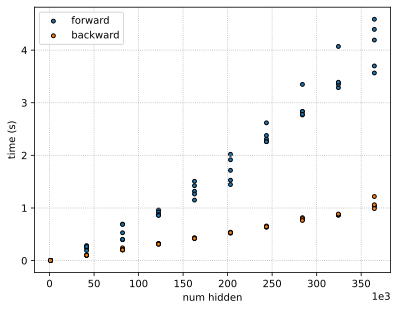

In [3]:
for i, size in enumerate(network_size):
    for j in range(5):
        # add label once
        if j == 0 and i == 0:
            plt.scatter(size, fwd_times[i][j], color="C0", edgecolor="black", s=15, label="forward")
            plt.scatter(size, bwd_times[i][j], color="C1", edgecolor="black", s=15, label="backward")
        else:
            plt.scatter(size, fwd_times[i][j], color="C0", edgecolor="black", s=15)
            plt.scatter(size, bwd_times[i][j], color="C1", edgecolor="black", s=15)

plt.legend()
plt.xlabel("num hidden")
plt.ylabel("time (s)")
plt.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
plt.grid(linestyle="dotted")

**Figure.** Roughly linear time complexity in network size for both forward and backward passes.